In [1]:
from pandas import Series
from matplotlib import pyplot
import pandas as pd
import numpy as np

In [21]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
d = pd.read_csv('Data1\\Data1\\section 5\\AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse,)

In [6]:
d.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


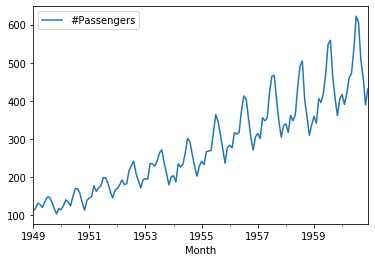

In [7]:
d.plot()
pyplot.show()

In [8]:
#remove seasonal difference
differenced = d.diff(12)

In [9]:
differenced.head(n=13)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [10]:
#trim off first year of empty data
differenced = differenced[12:]
differenced.head(n=13)

,#Passengers
Month,
1950-01-01,3.0
1950-02-01,8.0
1950-03-01,9.0
1950-04-01,6.0
1950-05-01,4.0
1950-06-01,14.0
1950-07-01,22.0
1950-08-01,22.0
1950-09-01,22.0


In [22]:
type(differenced)

pandas.core.frame.DataFrame

In [24]:
data = differenced['#Passengers']
data.head()
type(data)

pandas.core.series.Series

### create new time series with 12 months lag values to predict the current observations

In [25]:
dataframe = pd.DataFrame()
for i in range(12,0,-1):
    dataframe['t-'+str(i)] = data.shift(i)
    dataframe['t'] = data.values
print(dataframe.head(13))
dataframe = dataframe[13:]

            t-12     t  t-11  t-10   t-9   t-8   t-7   t-6   t-5   t-4   t-3  \
Month                                                                          
1951-01-01   NaN  30.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1951-02-01   NaN  24.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1951-03-01   NaN  37.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1951-04-01   NaN  28.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  30.0   
1951-05-01   NaN  47.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  30.0  24.0   
1951-06-01   NaN  29.0   NaN   NaN   NaN   NaN   NaN   NaN  30.0  24.0  37.0   
1951-07-01   NaN  29.0   NaN   NaN   NaN   NaN   NaN  30.0  24.0  37.0  28.0   
1951-08-01   NaN  29.0   NaN   NaN   NaN   NaN  30.0  24.0  37.0  28.0  47.0   
1951-09-01   NaN  26.0   NaN   NaN   NaN  30.0  24.0  37.0  28.0  47.0  29.0   
1951-10-01   NaN  29.0   NaN   NaN  30.0  24.0  37.0  28.0  47.0  29.0  29.0   
1951-11-01   NaN  32.0   NaN  30.0  24.0

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
array = dataframe.values
#split into input and output
X = array[:,0:-1]
y = array[:,-1]

In [29]:
# fit random forest model
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [31]:
# show importtance scores
print(model.feature_importances_)
#plot important scores

[0.02478069 0.39914363 0.01520297 0.01825017 0.01204999 0.02577297
 0.01879303 0.01930898 0.02460936 0.04939165 0.10594396 0.2867526 ]


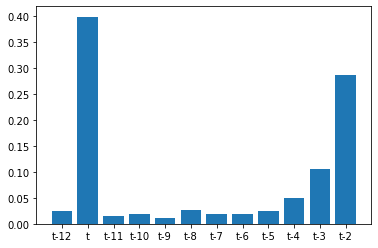

In [33]:
names = dataframe.columns.values[0:-1]
ticks = [i for i  in range(len(names))]
pyplot.bar(ticks, model.feature_importances_)
pyplot.xticks(ticks, names)
pyplot.show()

In [34]:
from sklearn.feature_selection import RFE

In [35]:
# perform feature selection
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), 4)
fit = rfe.fit(X, y)

In [36]:
names = dataframe.columns.values[0:-1]
for i in range(len(fit.support_)):
    if fit.support_[i]:
        print(names[i])

t
t-4
t-3
t-2
